In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 42.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston', version=1)

In [3]:
data=boston['data']
y=boston['target']

In [4]:
print(boston.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [5]:
## Lets check the description of the dataset
print(boston.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

In [6]:
print(boston.data)

        CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [7]:
X = boston.data
y = boston.target


Making Some EDA


In [8]:
dataset=pd.DataFrame(boston.data,columns=boston.feature_names)
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [9]:
dataset['Price']=boston.target
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  Price    506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [11]:
from sklearn.preprocessing import LabelEncoder
categorical_col=['CHAS','RAD']
for col in categorical_col:
  lt=LabelEncoder()
  dataset[col]=lt.fit_transform(dataset[col])

In [12]:
for col in categorical_col:
  dataset[col]=dataset[col].astype(float)

In [13]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
None


In [14]:
#summmarizing the datasets
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,3.723320,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,1.898027,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,0.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,2.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,4.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,5.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,8.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [16]:
###Exploratory data analysis
##Correlation
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,-0.332934,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,0.009882,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,-0.321017,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,0.076745,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,-0.241322,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,0.148088,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,-0.172216,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,0.199944,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,-0.332934,0.009882,-0.321017,0.076745,-0.241322,0.148088,-0.172216,0.199944,1.000000,-0.421613,-0.287226,0.221701,-0.256879,0.252442
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,-0.421613,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [17]:
# import seaborn as sns
# sns.pairplot(dataset)
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,0.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,1.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,1.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Text(0, 0.5, 'price')

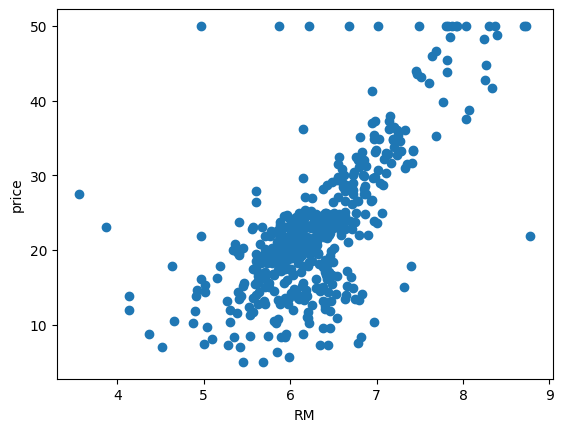

In [18]:
plt.scatter(dataset['RM'],dataset['Price'])
plt.xlabel('RM')
plt.ylabel('price')

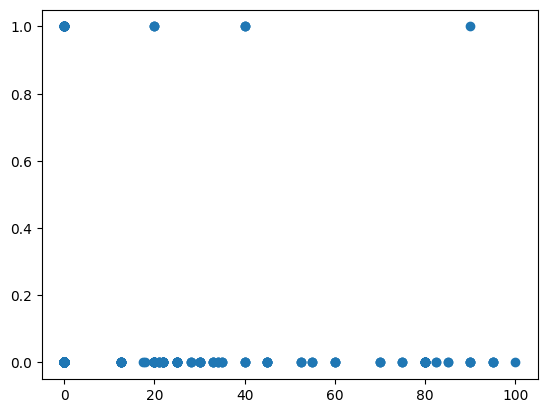

In [19]:
plt.scatter(dataset['ZN'],dataset['CHAS'])

Text(0, 0.5, 'Price')

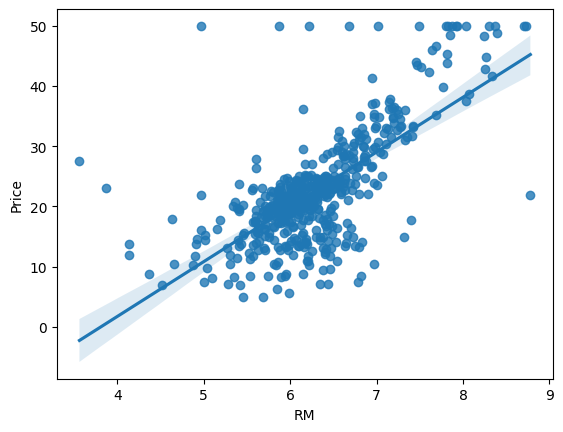

In [20]:
import seaborn as sns
sns.regplot(x="RM",y="Price",data=dataset)
plt.xlabel("RM")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

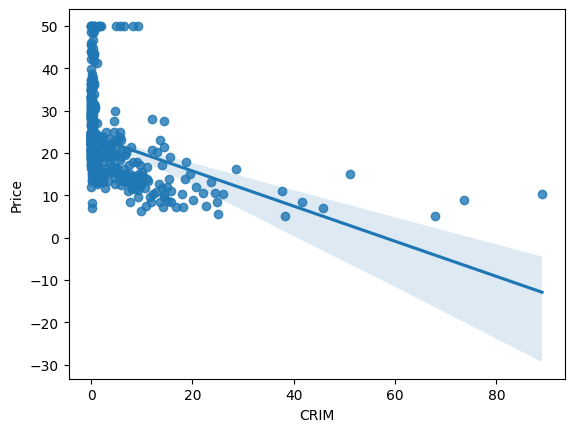

In [21]:
sns.regplot(x="CRIM",y="Price",data=dataset)
plt.xlabel("CRIM")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

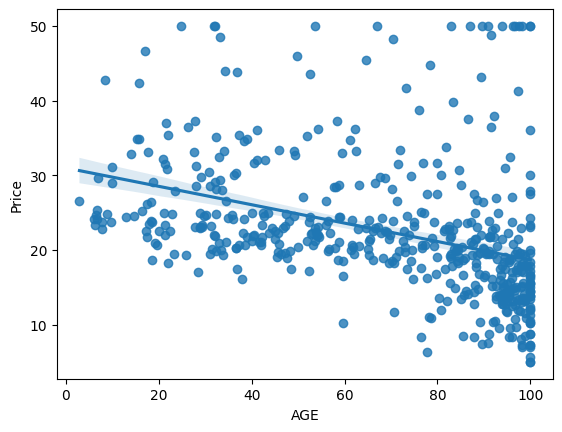

In [22]:
sns.regplot(x="AGE",y="Price",data=dataset)
plt.xlabel("AGE")
plt.ylabel("Price")

Text(0, 0.5, 'DIS')

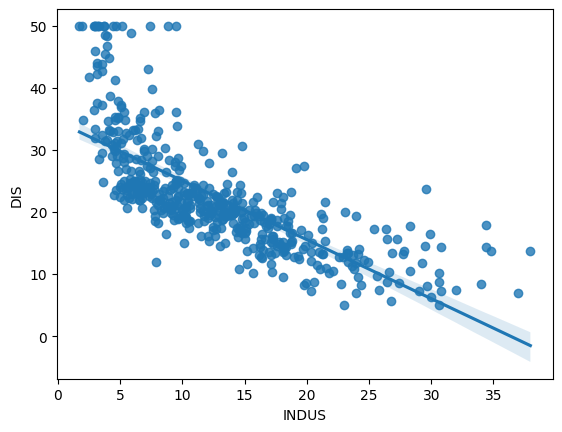

In [23]:
sns.regplot(x="LSTAT",y="Price",data=dataset)
plt.xlabel("INDUS")
plt.ylabel("DIS")

<Axes: xlabel='CHAS', ylabel='Price'>

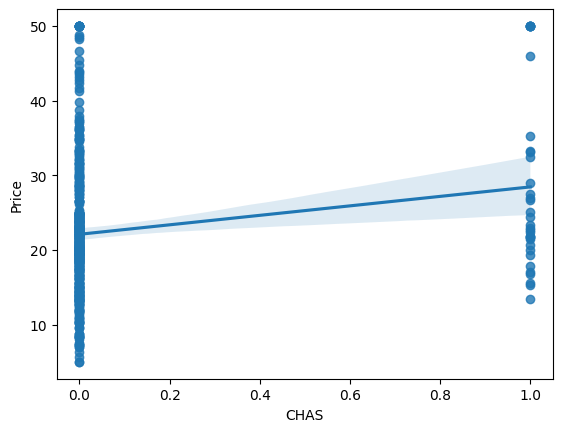

In [24]:
sns.regplot(x="CHAS",y="Price",data=dataset)


<Axes: xlabel='PTRATIO', ylabel='Price'>

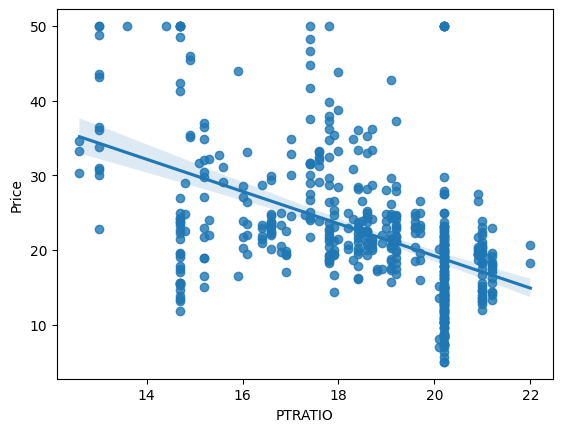

In [25]:
sns.regplot(x="PTRATIO",y="Price",data=dataset)


In [26]:
##Independent and Dependent features
X=dataset.iloc[:,:-1]
Y=dataset.iloc[:,-1]

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)


In [28]:
print(X_train.shape)
X_train.head()

(354, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
13,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4.0,307.0,21.0,396.90,8.26
61,0.17171,25.0,5.13,0.0,0.453,5.966,93.4,6.8185,8.0,284.0,19.7,378.08,14.44
377,9.82349,0.0,18.10,0.0,0.671,6.794,98.8,1.3580,2.0,666.0,20.2,396.90,21.24
39,0.02763,75.0,2.95,0.0,0.428,6.595,21.8,5.4011,3.0,252.0,18.3,395.63,4.32
365,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,2.0,666.0,20.2,354.70,7.12


In [29]:
#Standarize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [30]:
X_train=scaler.fit_transform(X_train)


In [31]:
X_test=scaler.transform(X_test)

Training Model


In [32]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [33]:
regression.fit(X_train,y_train)


LinearRegression()

In [34]:
#print the coefficents
regression.coef_

array([-0.4743555 ,  1.11379164, -0.1454102 ,  0.81577196, -2.25921322,
        2.12239183, -0.00471344, -3.12033575, -0.07962417,  0.46828887,
       -1.97980067,  0.52516405, -4.09288137])

In [35]:
regression.intercept_

22.33983050847458

In [36]:
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [37]:
#prediction with test data
reg_pred=regression.predict(X_test)

In [38]:
print(reg_pred)

[30.56695734 28.57917455 17.45939464 22.57832124 17.93788179 21.46775543
 31.4569616  18.4362495  24.08199986 27.64532871 26.30518157 29.45300946
 22.30199993 26.96209572 23.40630381 20.17956615 16.79522517 37.11577278
 31.4441324   9.04749431 20.93340922 17.09023116 25.31729796 24.84590178
 31.64483037 10.75869682 14.2451068  18.31063095 35.39908842 13.75561906
 22.93092871 13.40232966 41.50934307 17.28002941 24.15895172 21.36386278
 16.77267307 27.10525124  9.24621724 18.98362228 26.72774857 20.49972586
 28.45050572 15.3697885  18.56914124 14.42270587 40.61786152 17.58044801
 26.74205316 21.83469381 24.3528112  23.77036574 24.95801112 27.31809056
  9.39309219 22.74931969 10.06802342 27.20595124 17.23867138 34.86225995
 19.01687464 27.56874997 15.65202784 18.41155447 10.9061436  31.65314832
 35.72560946 25.15200135 24.36711296 25.69059134 23.50112219  6.78321041
 15.70145    20.82891726 21.74816262 20.80952734 33.90161048 28.92347797
 25.82204993 33.68528884 20.07641228 25.0873251  35

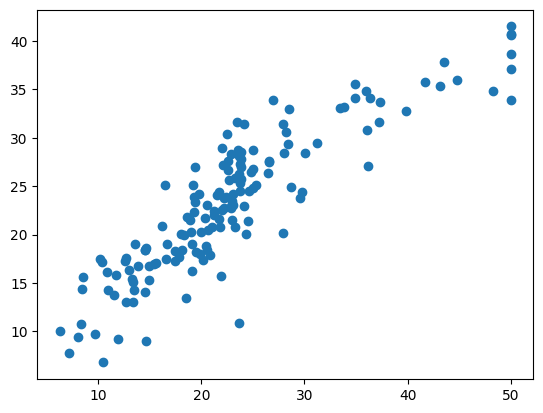

In [39]:
#plot a scatter for the prediction

plt.scatter(y_test,reg_pred)

In [40]:
##Residuals
residuals=y_test-reg_pred
print(residuals)

307   -2.366957
343   -4.679175
47    -0.859395
67    -0.578321
362    2.862118
         ...   
467    2.865055
95    -0.995454
122    1.670732
260    0.618501
23     0.469608
Name: Price, Length: 152, dtype: float64


<Axes: xlabel='Price', ylabel='Count'>

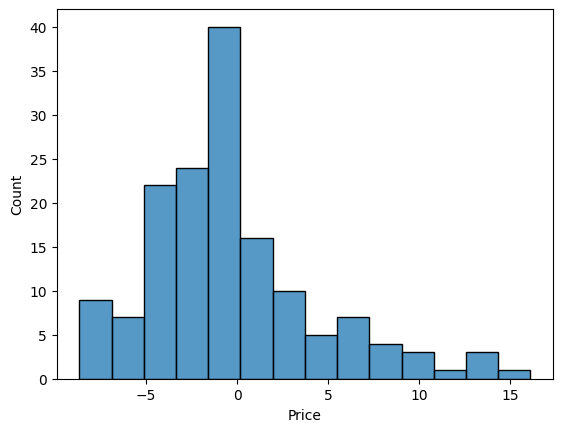

In [41]:
#plotting this residuals

sns.histplot(residuals)

<ipython-input-42-db293bac0641>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: xlabel='Price', ylabel='Density'>

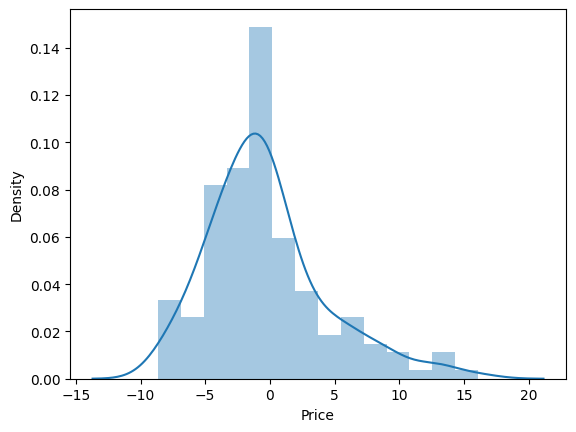

In [42]:
sns.distplot(residuals,kde=True)

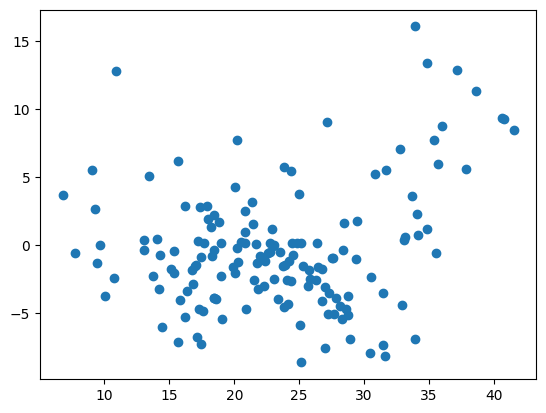

In [43]:
##scatter plot with respect to prediction and residuals
plt.scatter(reg_pred,residuals)

In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [45]:
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

21.123771839965933
3.438221798392283
4.596060469572385


In [46]:
#R square and adjusted R square
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.7695282303363524


In [47]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7478171215999219

New Pred